In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import randn
from pandas.plotting import scatter_matrix
import scipy.stats as st
from scipy.stats import zscore
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [5]:
employee_data = pd.read_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance.csv')
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
employee_data.shape

(1470, 35)

In [8]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
employee_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [16]:
#Mapping the attrition 1 - yes and 0 - no in the new column

employee_data["Attrition"] = np.where(employee_data["Attrition"] == "Yes",1,0)
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


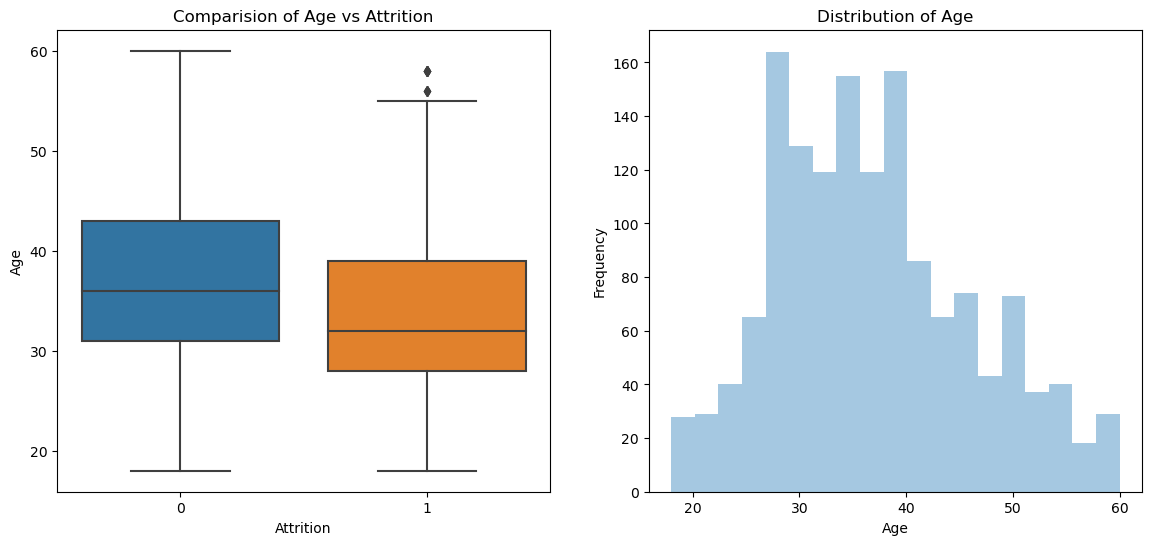

In [19]:
# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(employee_data,segment_by="Age")

1. We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.
2. From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't   left the company are of age 32 to 40 years

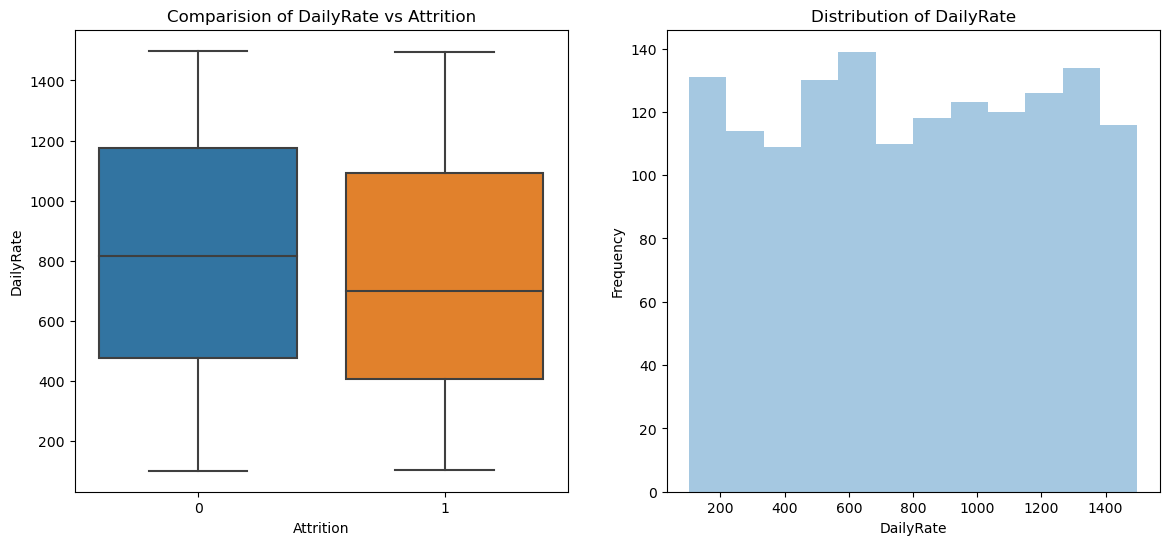

In [20]:
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(employee_data,"DailyRate")

1. Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates. The same trend is resonated with monthly income too.

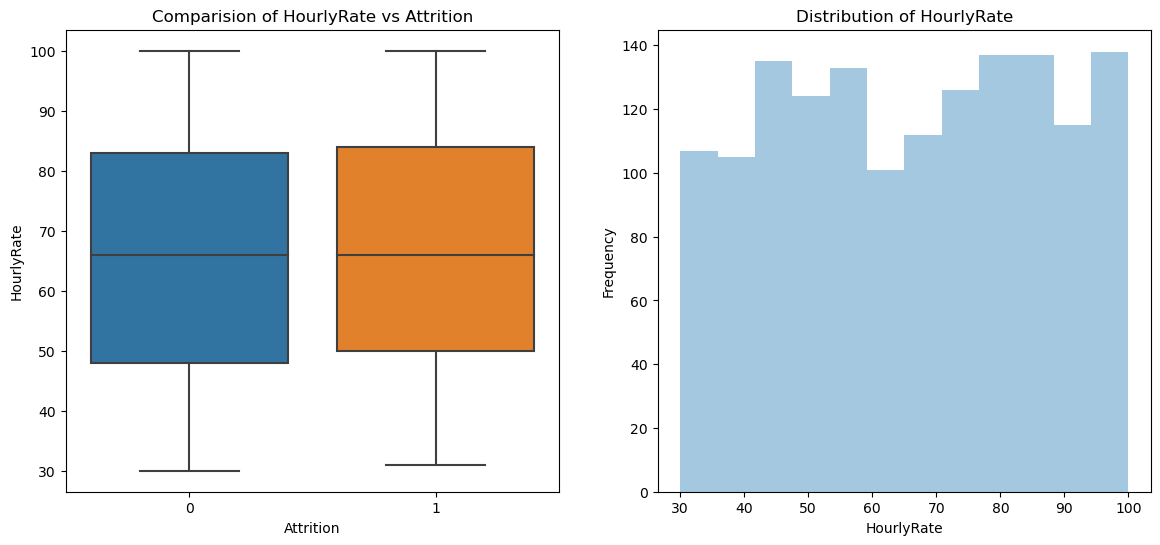

In [21]:
NumericalVariables_targetPlots(employee_data,"HourlyRate")

1. From plot we have seen that there is no significant difference in the hourly rate and attrition. Therefore hourly rate is considered as not signifcant to attrition.

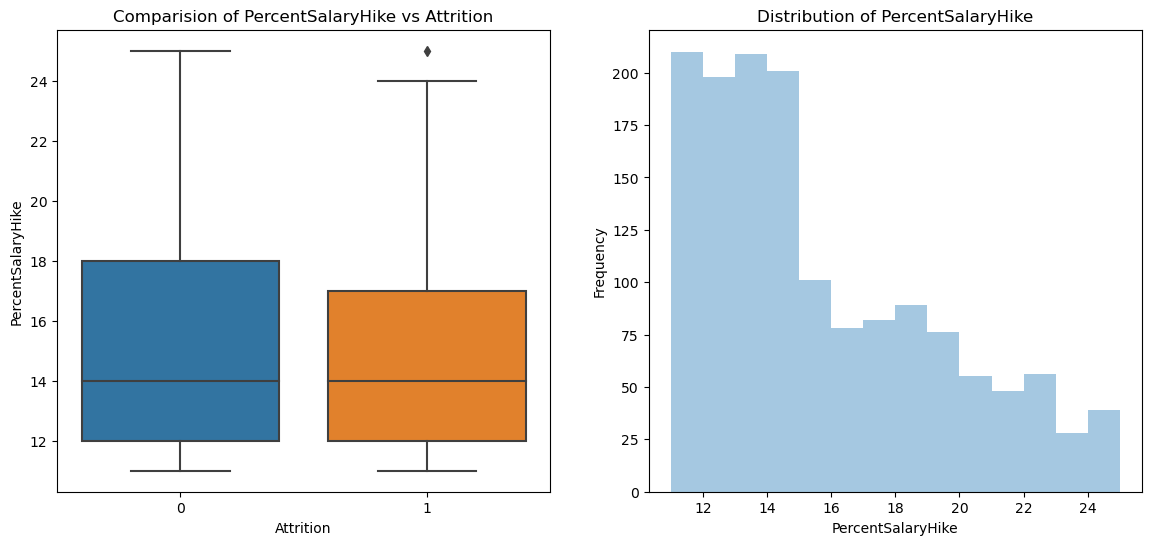

In [22]:
NumericalVariables_targetPlots(employee_data,"PercentSalaryHike")

1. Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

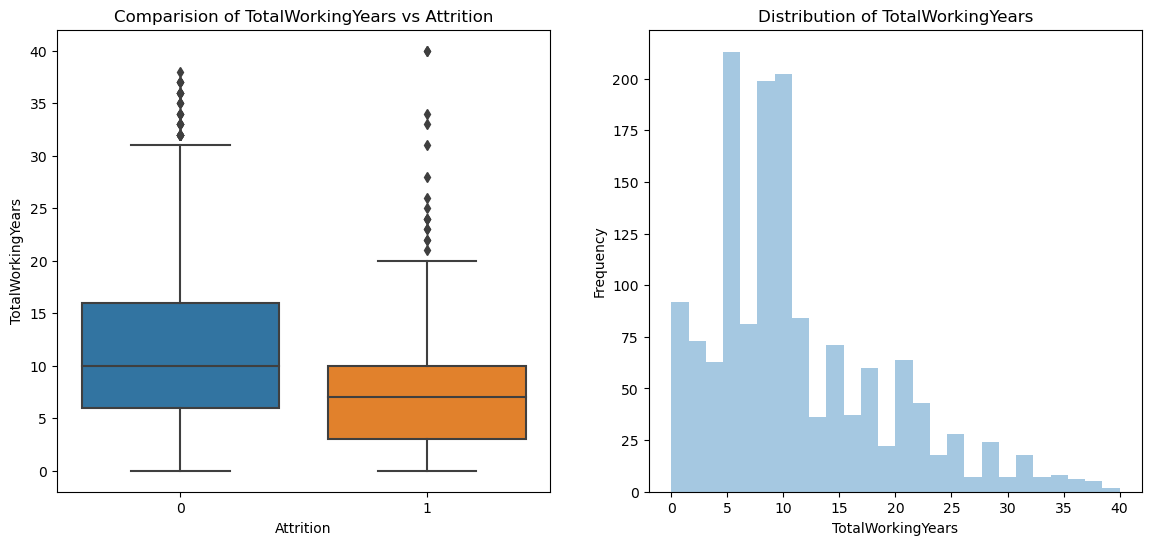

In [23]:
NumericalVariables_targetPlots(employee_data,"TotalWorkingYears")

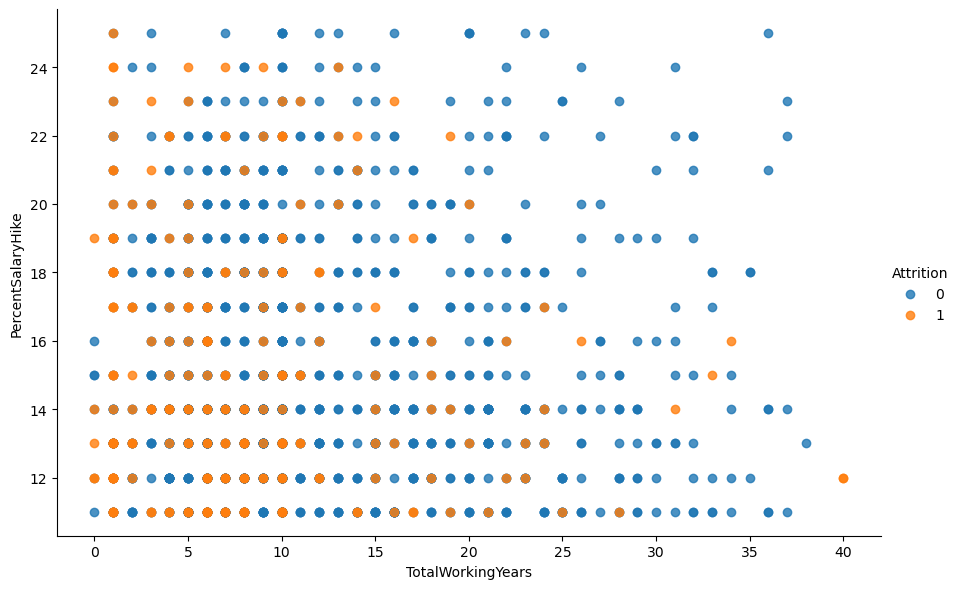

In [24]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=employee_data,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

1. Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike.
2. Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.
3. Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike

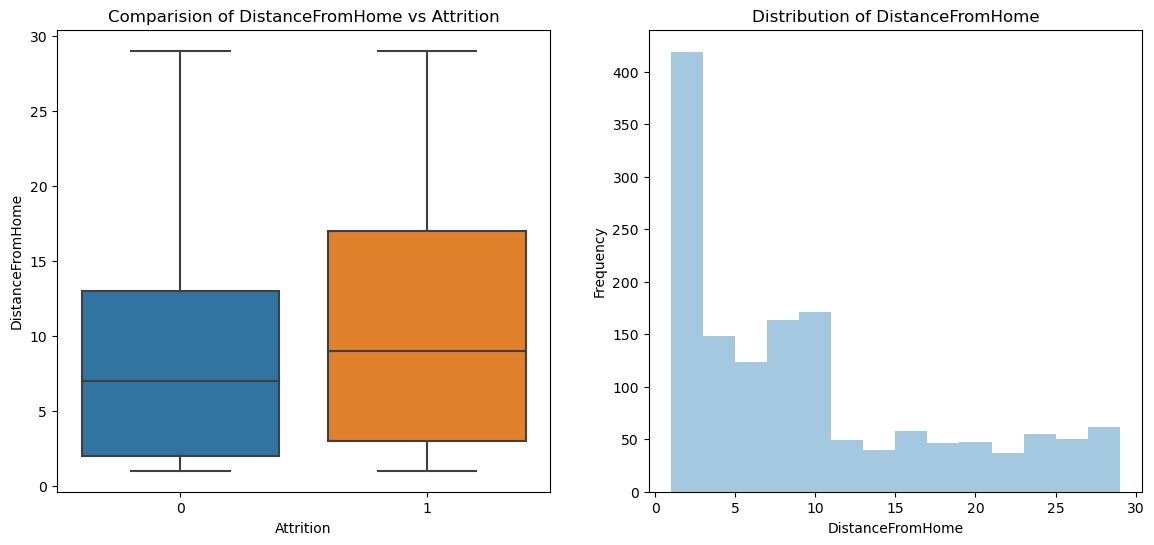

In [25]:
NumericalVariables_targetPlots(employee_data,"DistanceFromHome")

1. There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases

In [26]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(employee_data.JobInvolvement,employee_data.Attrition)

Attrition,0,1
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [27]:
#calculating the percentage of people having different job involvement rate
round(employee_data.JobInvolvement.value_counts()/employee_data.shape[0] * 100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

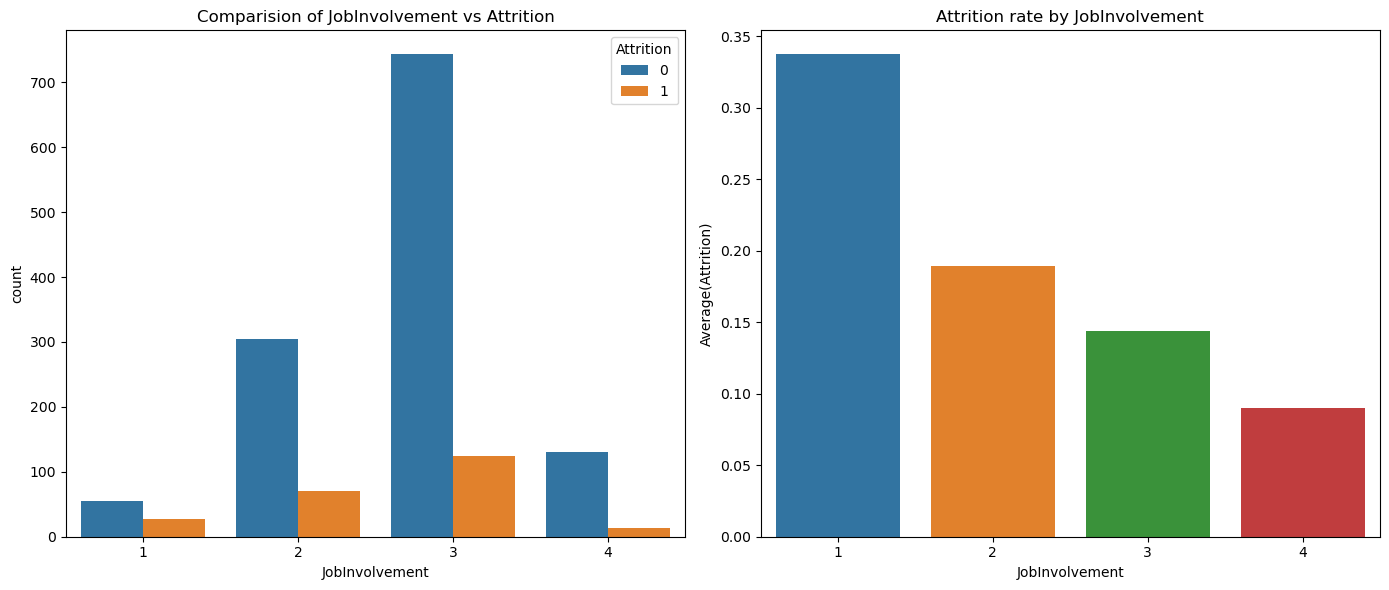

In [28]:
CategoricalVariables_targetPlots(employee_data,"JobInvolvement")

1. In the total data set, 59% have high job involvement whereas 25% have medium involvement rate
2. From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.
3. Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company

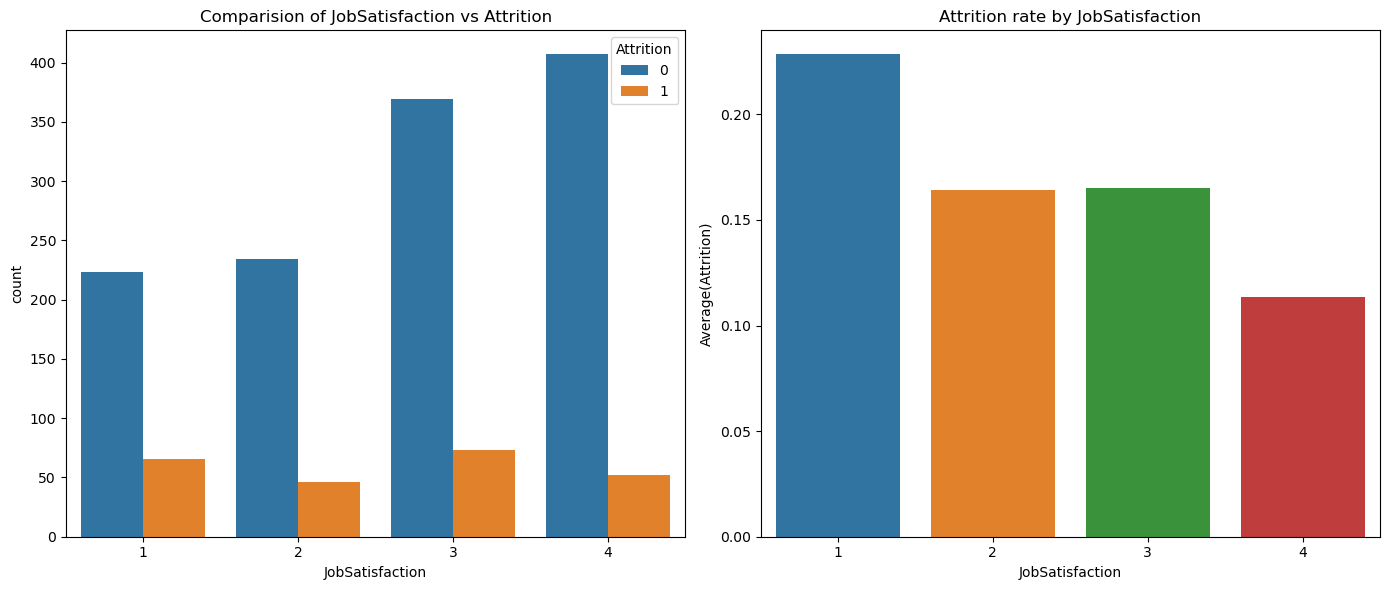

In [29]:
CategoricalVariables_targetPlots(employee_data,"JobSatisfaction")

1. As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

In [30]:
#checking the number of categories under performance rating
employee_data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [31]:
#calculate the percentage of performance rating per category in the whole dataset
round(employee_data.PerformanceRating.value_counts()/employee_data.shape[0] * 100,2)

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

1. Around 85% of people in the company rated as Excellent and remaining 15% rated as Outstanding

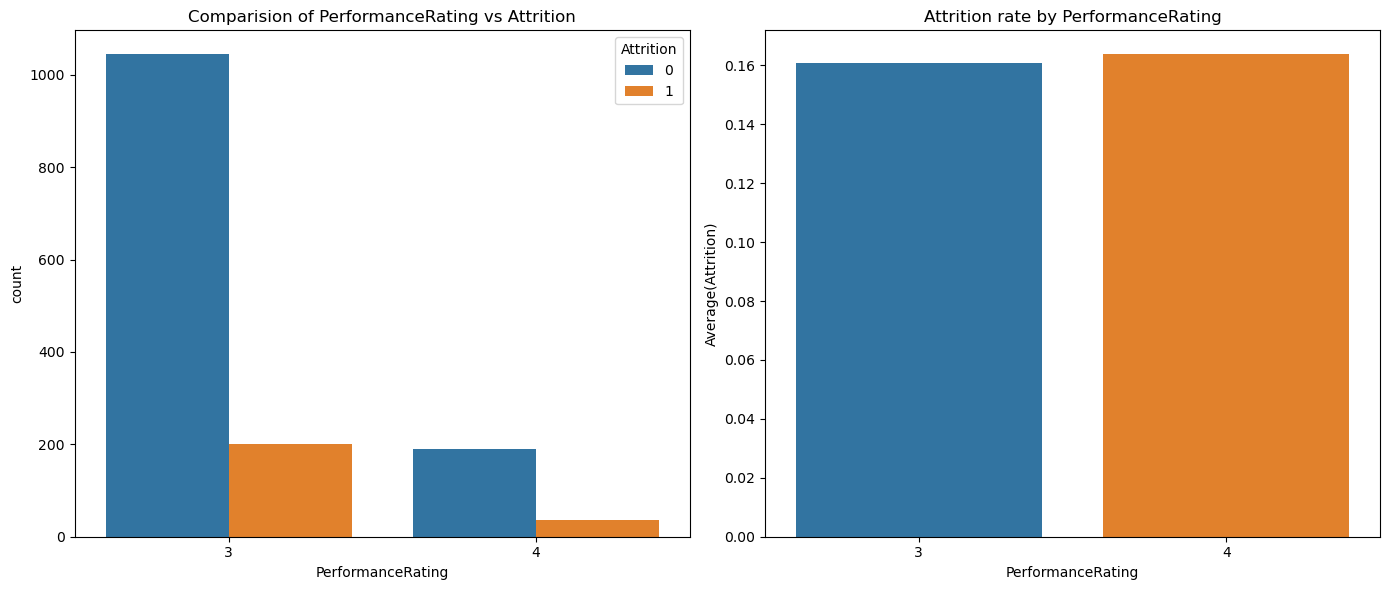

In [32]:
CategoricalVariables_targetPlots(employee_data,"PerformanceRating")

1. Contrary to normal belief that employee's having higher rating will not leave the company. It may be seen that there is no significant difference between the performance rating and Attrition Rate.

In [33]:
#percentage of each relationship satisfaction category across the data
round(employee_data.RelationshipSatisfaction.value_counts()/employee_data.shape[0],2)

3    0.31
4    0.29
2    0.21
1    0.19
Name: RelationshipSatisfaction, dtype: float64

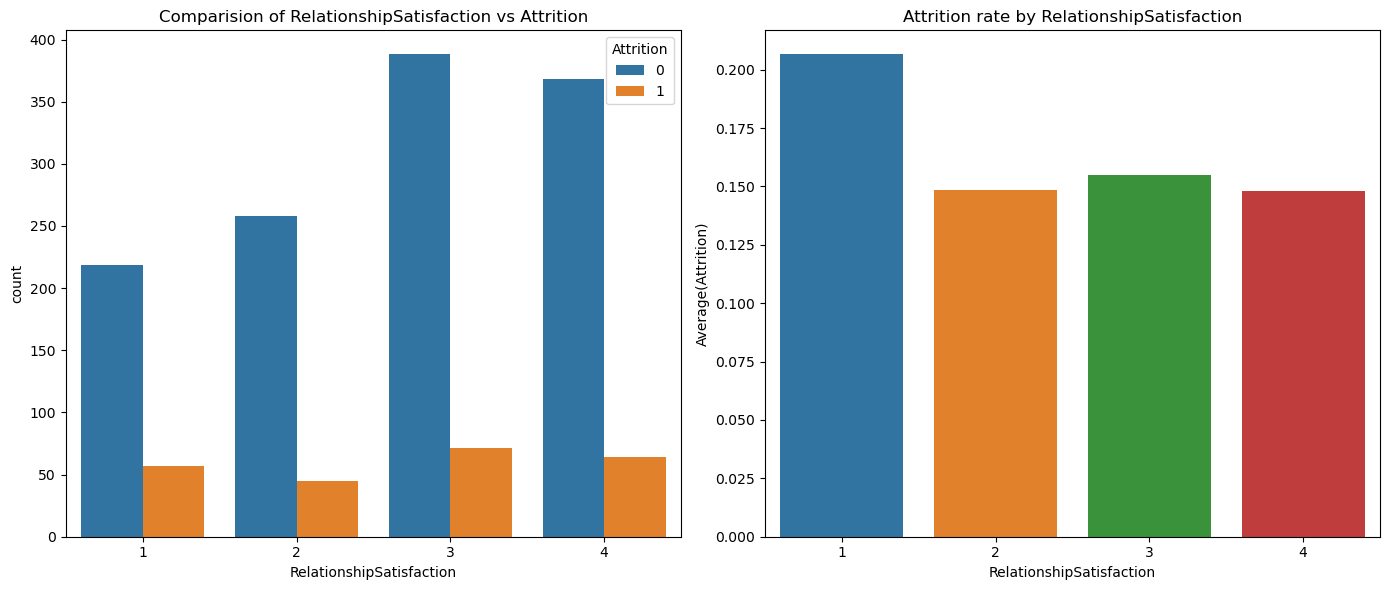

In [34]:
CategoricalVariables_targetPlots(employee_data,"RelationshipSatisfaction")

1. In this too, we found that almost 30% of employees with high and very high RelationshipSatisfaction have left the company. Here also there is no visible trend among the relationshipsatisfaction and attrition rate

In [35]:
#percentage of worklife balance rating across the company data
round(employee_data.WorkLifeBalance.value_counts()/employee_data.shape[0],2)

3    0.61
2    0.23
4    0.10
1    0.05
Name: WorkLifeBalance, dtype: float64

1. More than 60% of the employee's rated that they have Better worklife balance and 10% rated for Best worklife balance

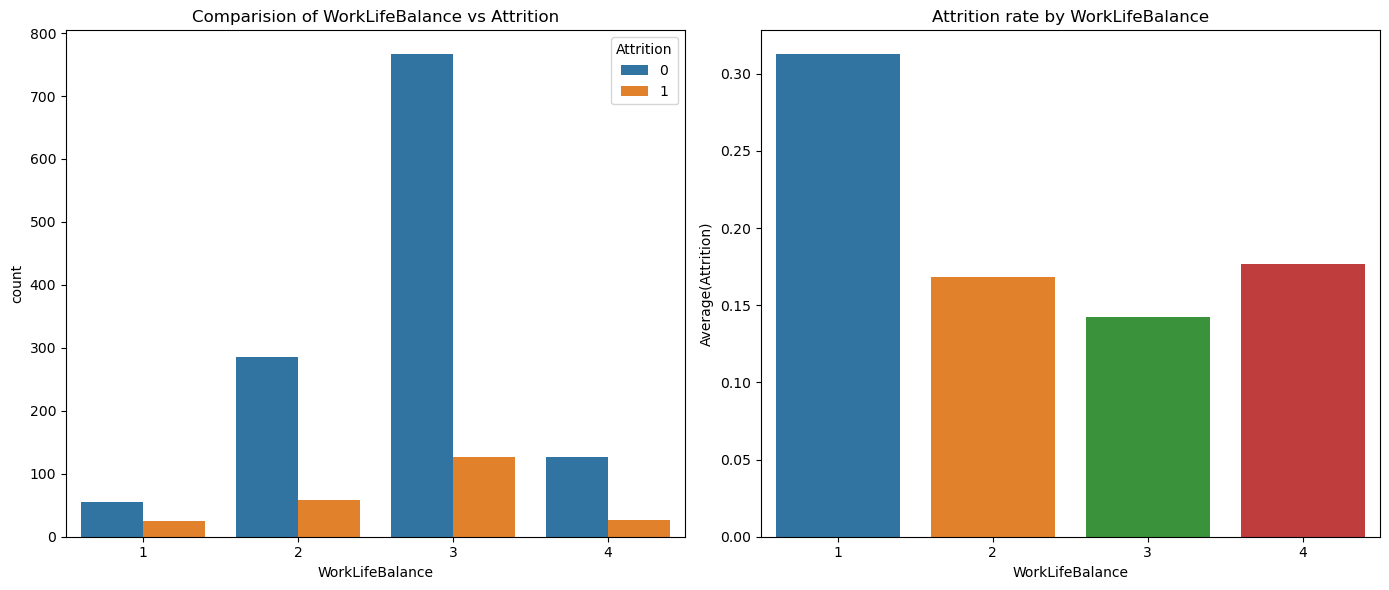

In [36]:
CategoricalVariables_targetPlots(employee_data,"WorkLifeBalance")

1. As expected more than 30% of the people who rated as Bad WorkLifeBalance have left the company and around 15% of the people who rated for Best WorkLifeBalance also left the company

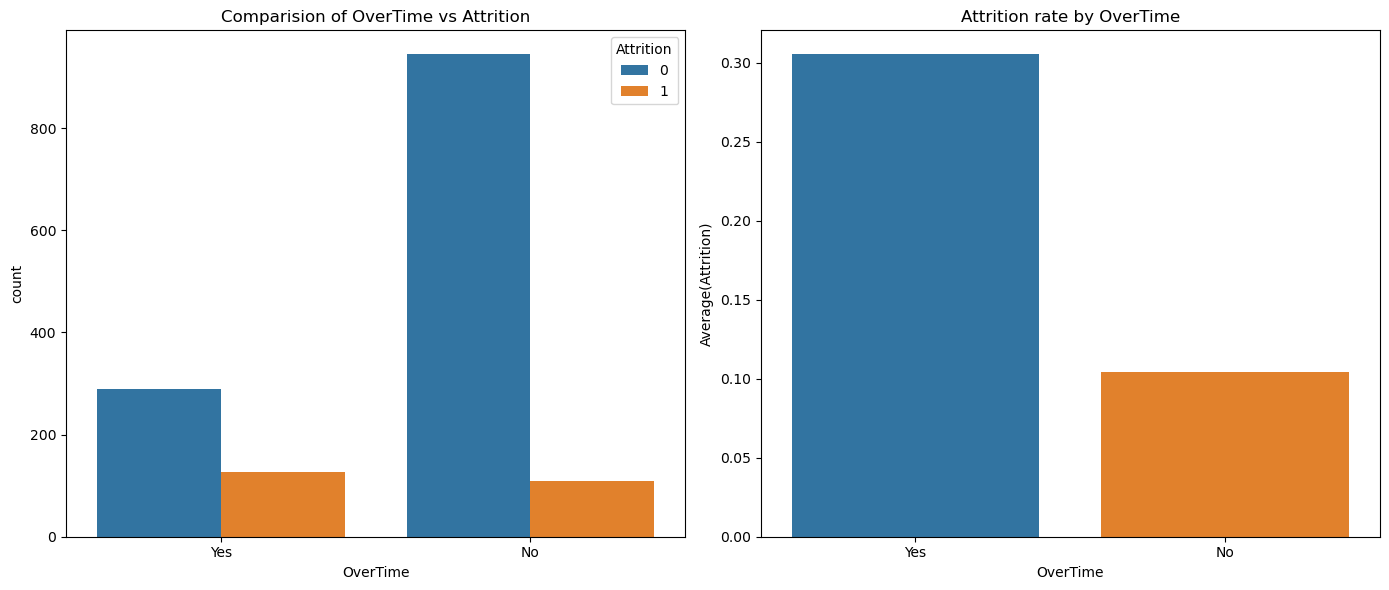

In [37]:
CategoricalVariables_targetPlots(employee_data,"OverTime")

1. More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime has not left the company. Therefore overtime is a strong indicator of attrition.

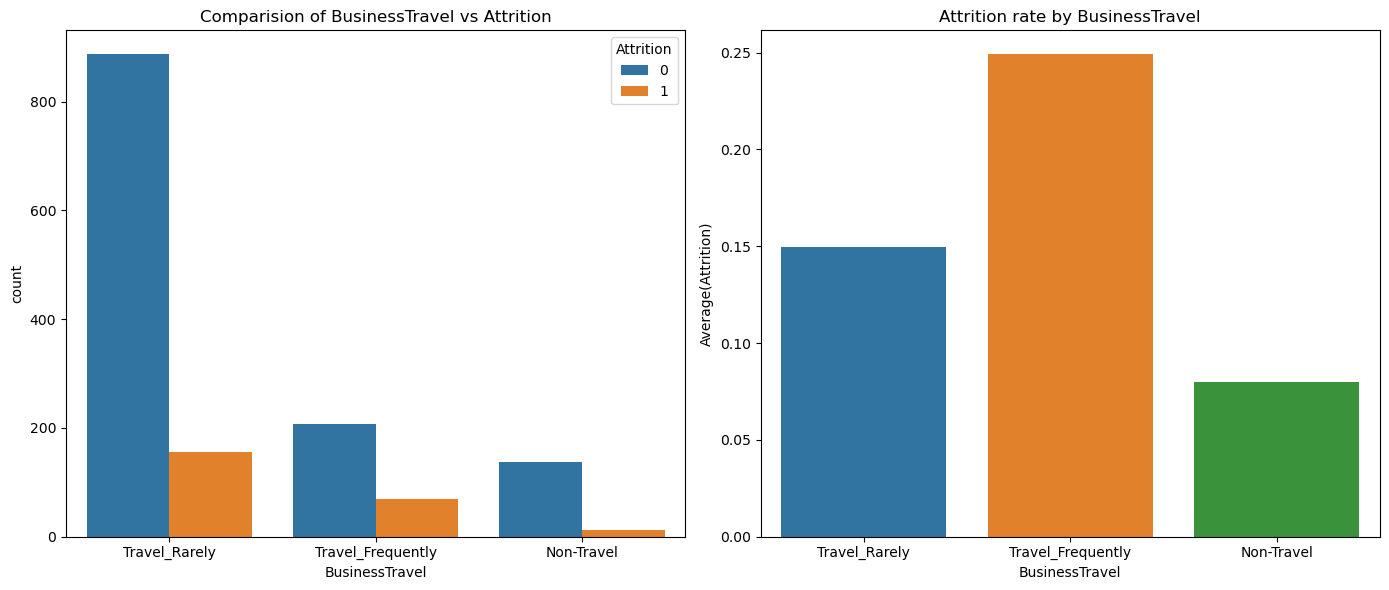

In [38]:
CategoricalVariables_targetPlots(employee_data,segment_by="BusinessTravel")

1. There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

In [39]:
employee_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

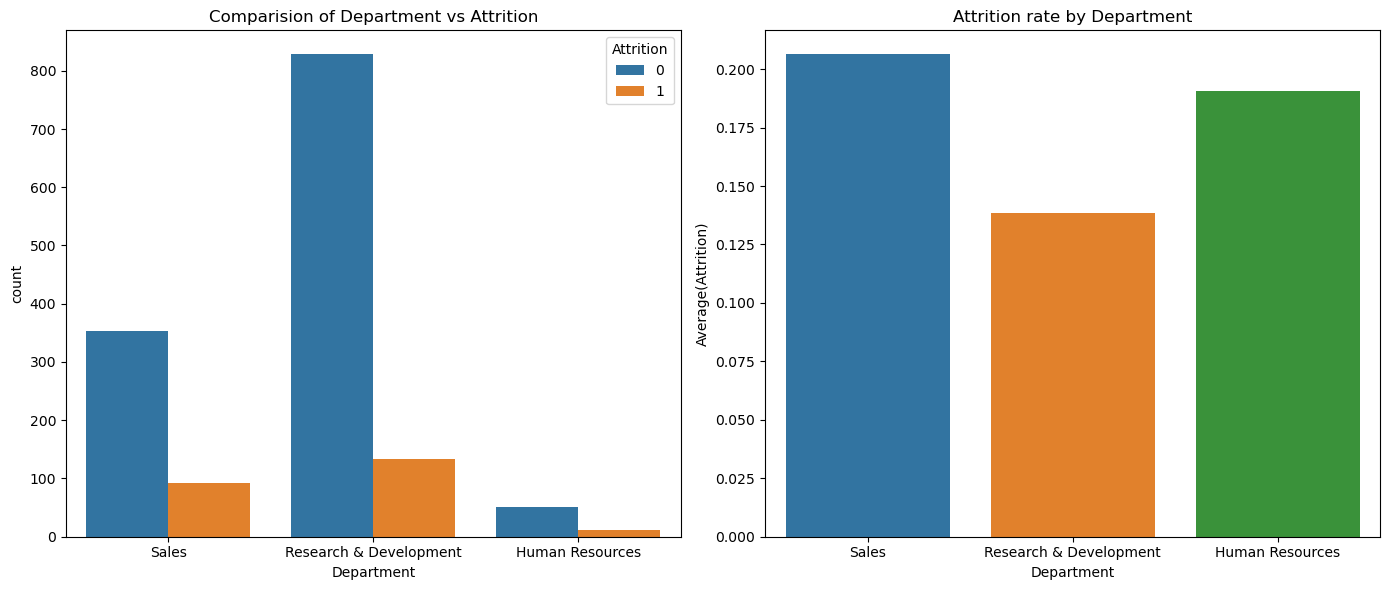

In [40]:
CategoricalVariables_targetPlots(employee_data,segment_by="Department")

1. On comparing departmentwise,we can conclude that HR has seen only a marginal high in turnover rates whereas the numbers are significant in sales department with turnover rates of 39 %. The attrition levels are not appreciable in R & D where 67 % have recorded no attrition.
2. Sales has seen higher attrition levels about 20.6% followed by HR around 18%

In [41]:
employee_data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

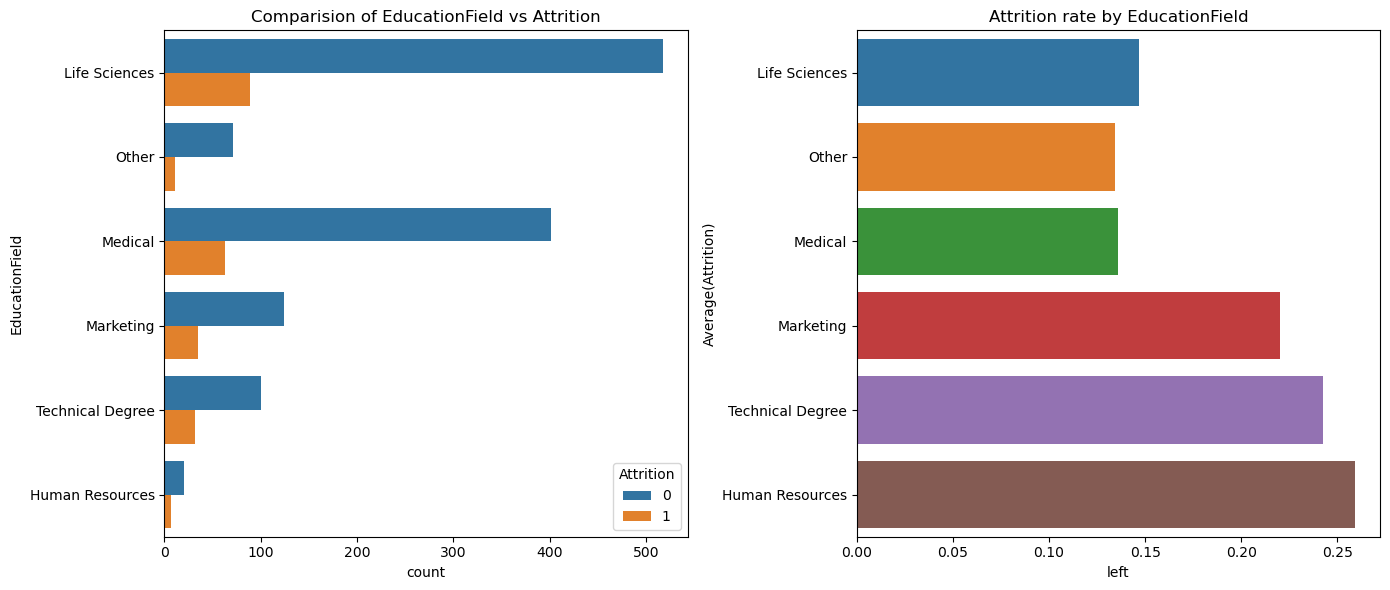

In [42]:
CategoricalVariables_targetPlots(employee_data,"EducationField",invert_axis=True)

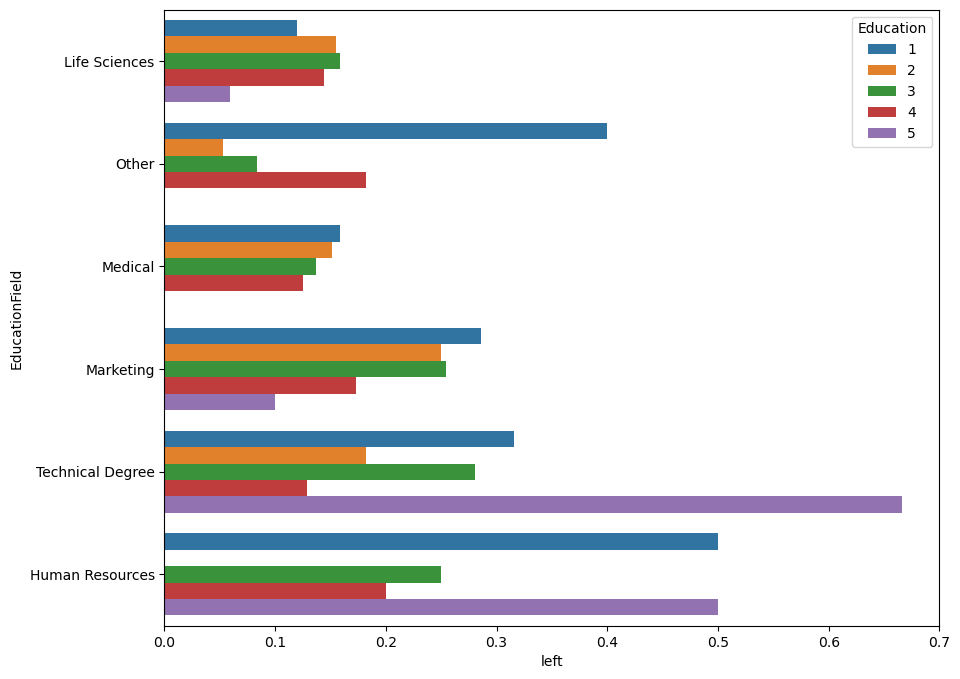

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=employee_data,ci=None)
plt.show()

1. There are more people with a Life sciences followed by medical and marketing
2. Employee's in the EducationField of Human Resources and Technical Degree have highest attrition levels around 26% and 23% respectively
3. When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition

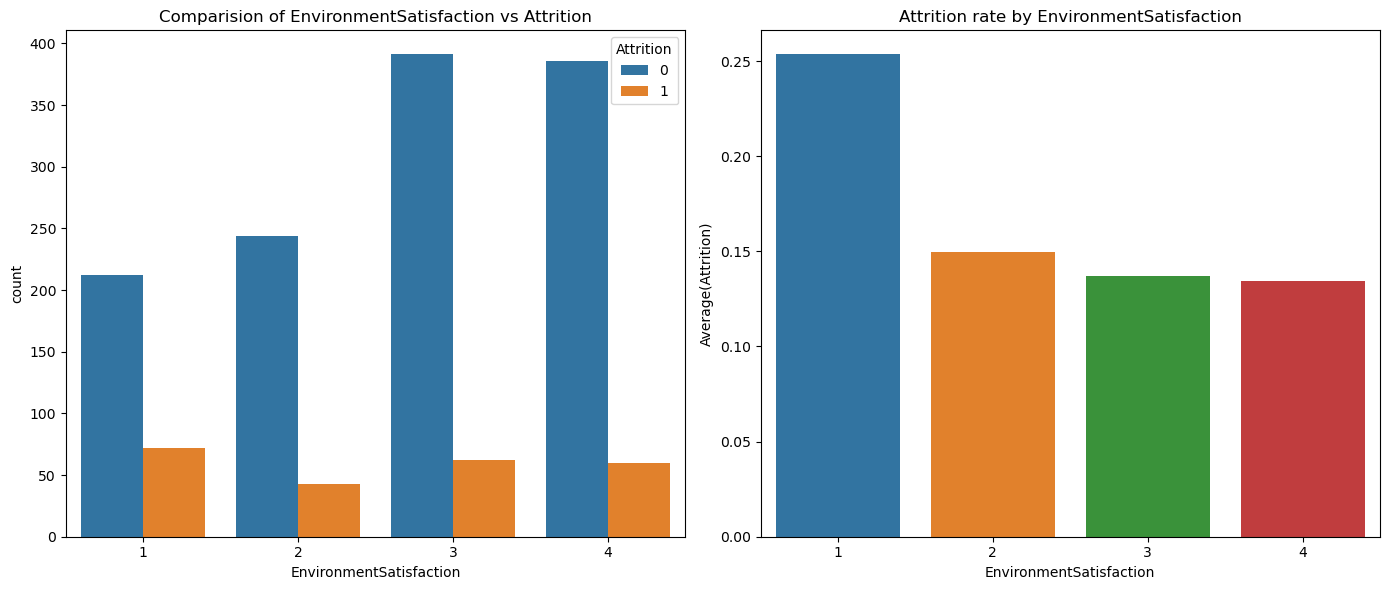

In [44]:
CategoricalVariables_targetPlots(employee_data,"EnvironmentSatisfaction")

1. we can see that people having low environment satisfaction 25% leave the company

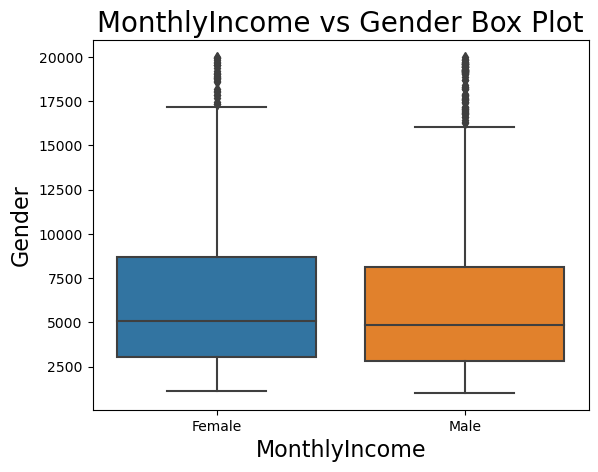

In [45]:
sns.boxplot(employee_data['Gender'], employee_data['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

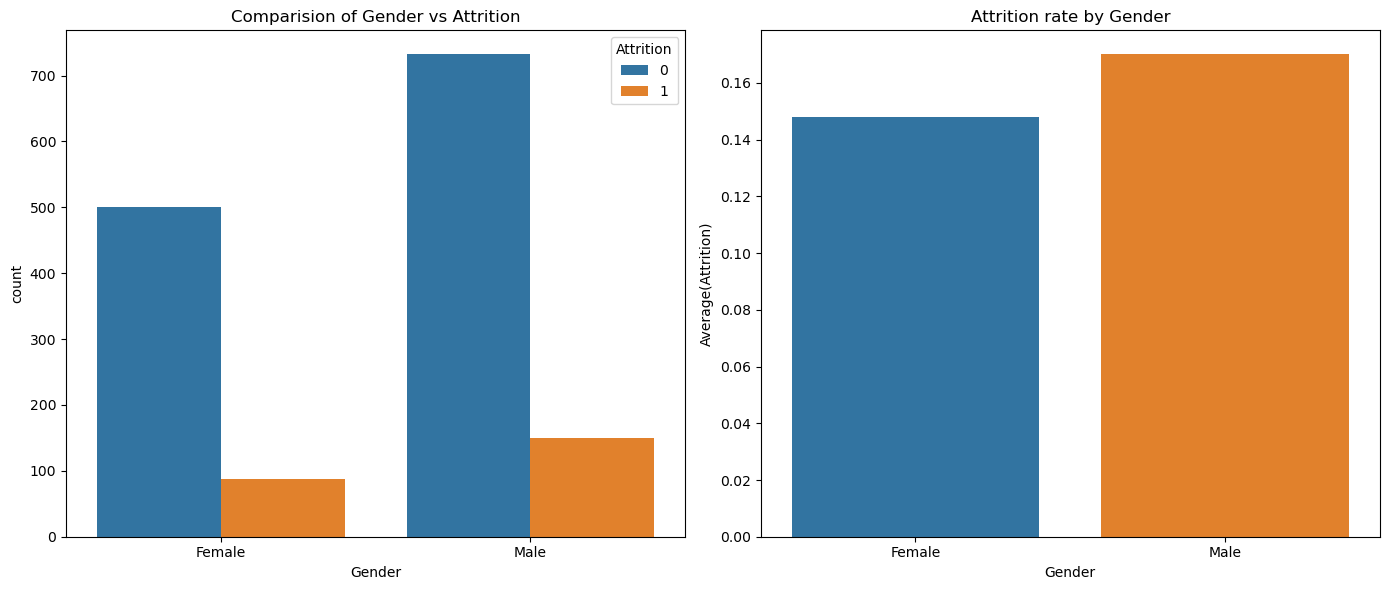

In [46]:
CategoricalVariables_targetPlots(employee_data,"Gender")

1. Monthly Income distribution for Male and Female is almost similar, so the attrition rate of Male and Female is almost the same around 15%. Gender is not a strong indicator of attrition

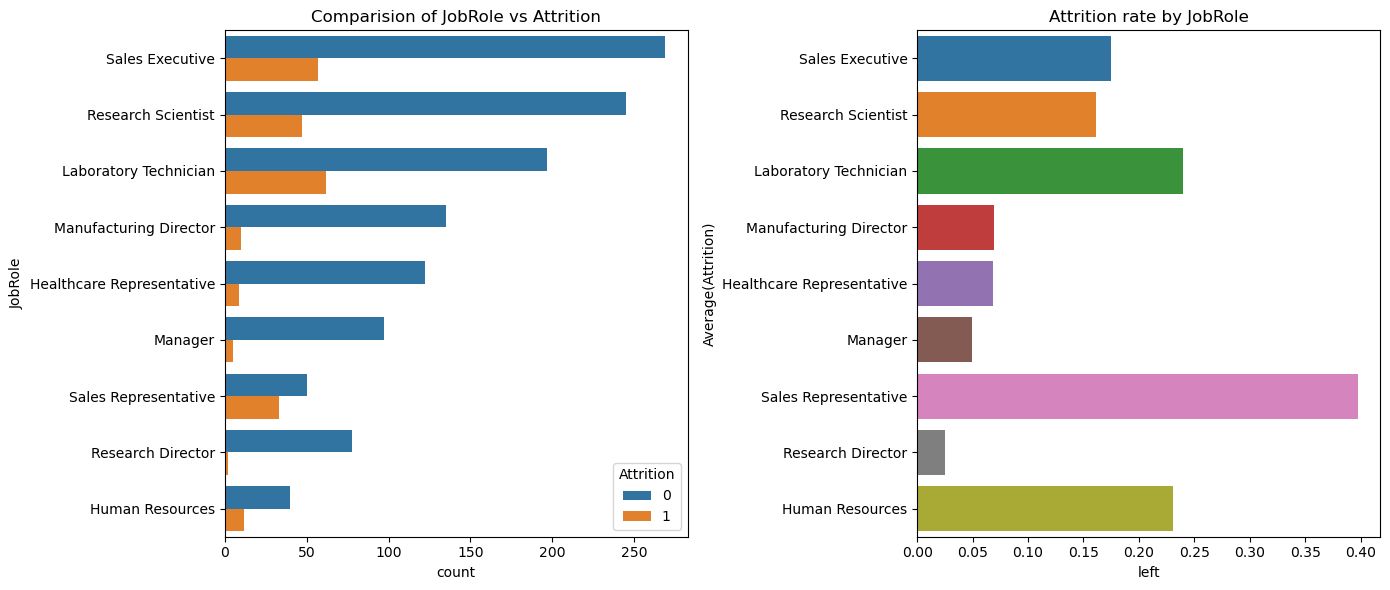

In [48]:
CategoricalVariables_targetPlots(employee_data,"JobRole",invert_axis=True)

1. Jobs held by the employee is maximum in Sales Executive, then R&D , then Laboratory Technician
2. People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates are 40%, 24% and 22% respectively

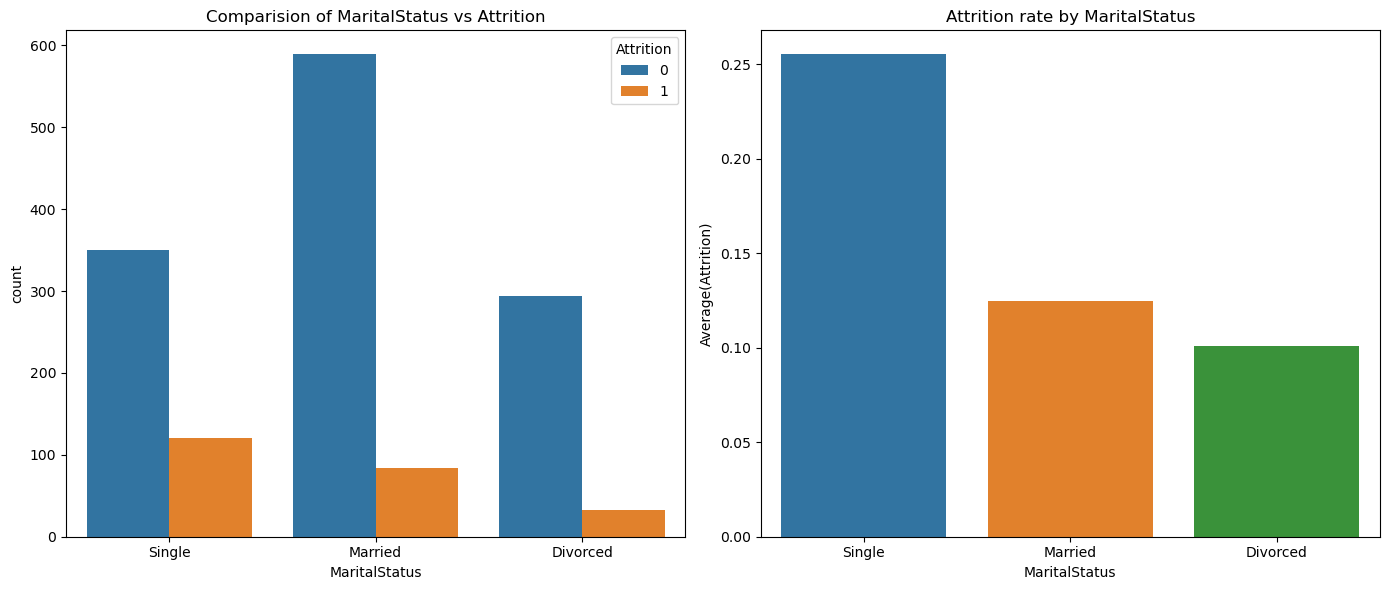

In [49]:
CategoricalVariables_targetPlots(employee_data,"MaritalStatus")

1. From the plot,it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is a weak predictor of attrition

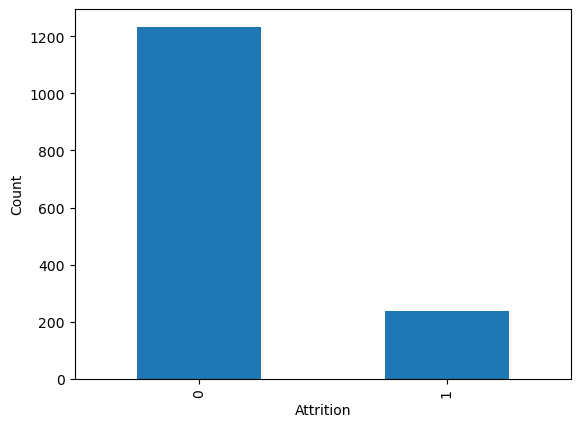

In [50]:
employee_data.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [51]:
employee_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

From the Exploratory data analysis, variable that are not significant to attrition are:

EmployeeCount, EmployeeNumber, Gender, HourlyRate, JobLevel, MaritalStatus, Over18, StandardHours

In [56]:
#copying the main employee data to another dataframe
employee_data_new = employee_data.copy()

In [57]:
#dropping the not significant variables
employee_data_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

In [58]:
#data types of variables
dict(employee_data_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('int32'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [59]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(employee_data_new.dtypes) if dict(employee_data_new.dtypes)[key] in ["object"]]

In [60]:
categorical_variable_names

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [63]:
numeric_variable_names

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [64]:
employee_data_num = employee_data_new[numeric_variable_names]

In [65]:
#store the categorical variables data in seperate dataset

employee_data_cat = employee_data_new[categorical_variable_names]
#dropping the attrition 
numeric_variable_names.drop(["Attrition"],axis=1,inplace=True)

AttributeError: 'list' object has no attribute 'drop'

In [67]:
employee_data_cat = pd.get_dummies(employee_data_cat)
employee_data_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [70]:
employee_data_final = pd.concat([employee_data_num, employee_data_cat,employee_data_new[["Attrition"]]],axis=1)
employee_data_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1,1102,1,2,2,3,2,4,5993,...,0,0,1,0,0,0,1,0,1,1
1,49,0,279,8,1,3,2,2,2,5130,...,0,1,0,0,0,1,0,1,0,0
2,37,1,1373,2,2,4,2,1,3,2090,...,0,0,0,0,0,0,1,0,1,1
3,33,0,1392,3,4,4,3,1,3,2909,...,0,1,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,3,1,2,3468,...,0,0,0,0,0,1,0,1,0,0


In [72]:
#final features
features =  list(employee_data_final.columns.difference(["Attrition"]))
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PerformanceRating',

In [73]:
#seperating the target and predictors

X = employee_data_final[features]
y = employee_data_final[["Attrition"]]

In [74]:
X.shape

(1470, 48)

In [75]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

In [76]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [80]:
#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

In [81]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [82]:
scores['test_score'].mean()

0.8367227089746626

Average accuracy of pipeline with Decision Tree Classifier is 83.48%